Initially, there seemed to be severe back-bending of at least 1 MHz between 200 mK and 250 mK. After examining more data, this seems to have been random LO offsets in some, but not all of the scans.

The 2605 MHz resonance targeted in the fine sweep seems to have vanished, and there is a new coherent-looking feature nearby. 

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic, temperature
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [64]:
plot_directory = '/home/flanigan/temp/'

In [36]:
scan0p1 = '/data/detectors/2017-02-24_161657_scan.npd/'  # 0.20 K
scans0p5 = ['/data/detectors/2017-02-26_193559_scan.npd/',  # 0.25 K
            '/data/detectors/2017-02-26_202414_scan.npd/',  # 0.30 K
            '/data/detectors/2017-02-27_162732_scan.npd/',  # 0.33 K
            '/data/detectors/2017-02-27_164400_scan.npd/',  # 0.20 K
            '/data/detectors/2017-02-27_172121_scan.npd/',  # 0.35 K
            '/data/detectors/2017-02-27_172835_scan.npd/',  # 0.37 K
            '/data/detectors/2017-02-27_174129_scan.npd/',  # 0.315 K
            '/data/detectors/2017-02-27_205636_scan.npd/',  # 0.075 K
            '/data/detectors/2017-02-27_210729_scan.npd/',  # 0.150 K
            '/data/detectors/2017-02-27_214256_scan.npd/',  # 0.270 K
           ]

In [37]:
npd0p1 = npy.NumpyDirectory(scan0p1)
npds0p5 = [npy.NumpyDirectory(f) for f in scans0p5]

In [5]:
# The file order is SweepArray, ADCSnap
def load_index(index):
    sweeps = [npd.read('SweepArray{:d}'.format(2 * index)) for npd in npds0p5]
    for sweep in sweeps:
        temperature.add_temperature(sweep, cryostat='HPD')
    return sweeps

In [141]:
i0 = load_index(0)

In [171]:
temperatures = [sweep.state.temperature.package for sweep in i0]
temperature_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=np.min(temperatures),
                                                                       vmax=np.max(temperatures)),
                                             cmap=mpl.cm.coolwarm)
def temperature_mapper(sweep):
    return temperature_mappable.to_rgba(sweep.state.temperature.package)

def temperature_sorter(sweep):
    return sweep.state.temperature.package

temperature_label = '{:.3f} K'

epochs = [sweep.start_epoch() for sweep in i0]
start_epoch = np.min(epochs)
epoch_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0,
                                                                 vmax=np.max(epochs) - start_epoch),
                                             cmap=mpl.cm.coolwarm)
def epoch_mapper(sweep):
    return epoch_mappable.to_rgba(sweep.start_epoch() - start_epoch)

def epoch_sorter(sweep):
    return sweep.start_epoch() - start_epoch

epoch_label = '{:.7g} s'

In [152]:
def plot_all(sweeps, ax, decibels=True, color_mapper=temperature_mapper, sorter=temperature_sorter,
            label=temperature_label):
    for sweep in sorted(sweeps, key=sorter):
        if decibels:
            s21 = 20 * np.log10(np.abs(sweep.s21_point_foreground))
            ylabel = '$|S_{21}|^2$ / dB'
        else:
            s21 = np.abs(sweep.s21_point_foreground)
            ylabel = '$|S_{21}|$'
        ax.plot(sweep.frequency_MHz, s21,
                label=label.format(sorter(sweep)),
                color=color_mapper(sweep))
        ax.set_xlabel('frequency / MHz')
        ax.set_ylabel(ylabel)

In [159]:
def fit_and_plot(sa, ax, min_snr=0.5, Q=30000, num_linewidths=10, threshold=1, mappable=None):
    peaks = sa.find_resonances(min_snr=min_snr, threshold=threshold)
    rs = [sa.resonator(frequency=sa.frequency[peak], width=num_linewidths * sa.frequency.mean() / Q,
                       model=lmfit_resonator.LinearLossResonatorWithCable)
          for peak in peaks]
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point_foreground)),
            color='gray', alpha=0.5)
    for r in rs:
        if mappable is None:
            model_settings = {}
        else:
            model_settings = {'color': mappable.to_rgba(sa.state.temperature.package)}
        plot_basic.resonator_amplitude(r, ax, normalize=False, decibels=True, three_ticks=False,
                                       sweep_mean_settings={'alpha': 0}, model_settings=model_settings)

# 10

In [146]:
i10 = load_index(10)

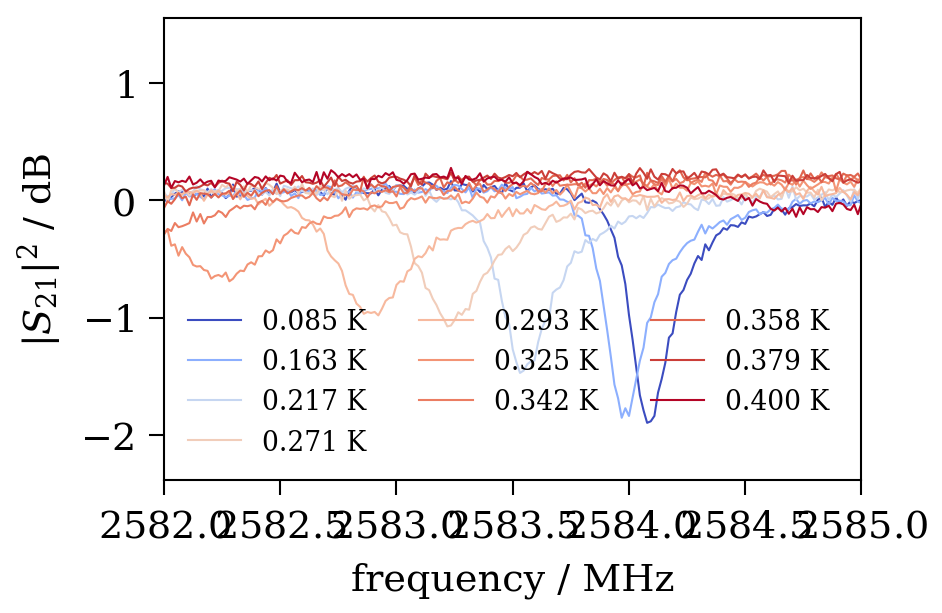

In [153]:
fig, ax = plt.subplots()
plot_all(i10, ax)
ax.legend(fontsize='xx-small', ncol=3)
ax.set_xlim(2582, 2585);

# 12

In [7]:
o12 = npd0p1.SweepArray54
temperature.add_temperature(o12, cryostat='HPD')

In [38]:
i12 = load_index(12)

retrying...


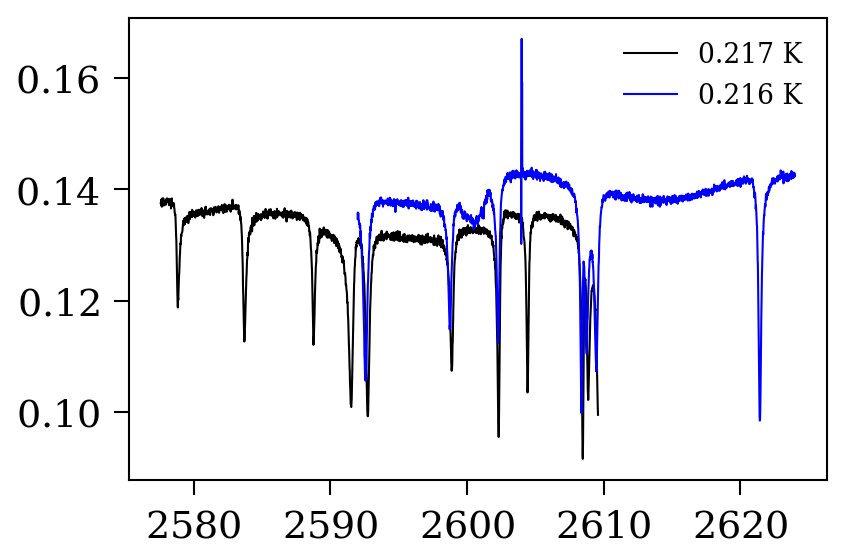

In [154]:
fig, ax = plt.subplots()
ax.plot(o12.frequency_MHz, np.abs(o12.s21_point), color='black',
        label='{:.3f} K'.format(o12.state.temperature.package))
ax.plot(i12[3].frequency_MHz, np.abs(i12[3].s21_point), color='blue',
        label='{:.3f} K'.format(i12[3].state.temperature.package))
ax.legend(fontsize='xx-small')

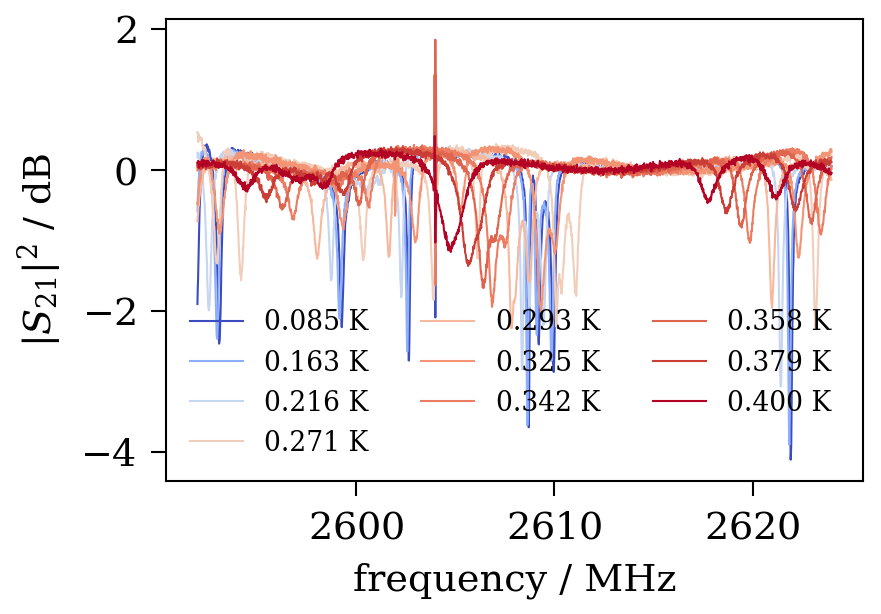

In [155]:
fig, ax = plt.subplots()
plot_all(i12, ax)
ax.legend(fontsize='xx-small', ncol=3)

# 15

In [41]:
i15 = load_index(15)

retrying...


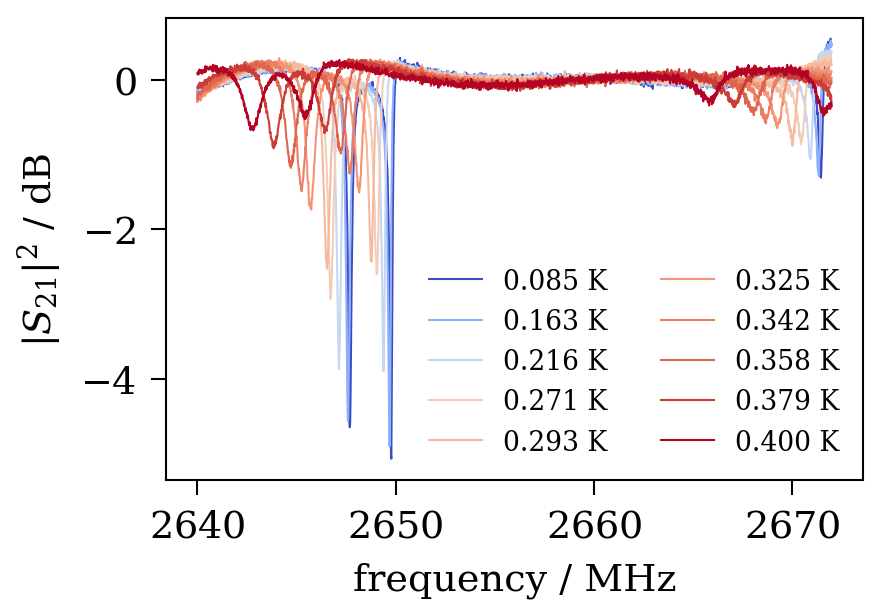

In [156]:
fig, ax = plt.subplots()
plot_all(i15, ax)
ax.legend(fontsize='xx-small', ncol=2)

# 17

In [136]:
i17 = load_index(17)

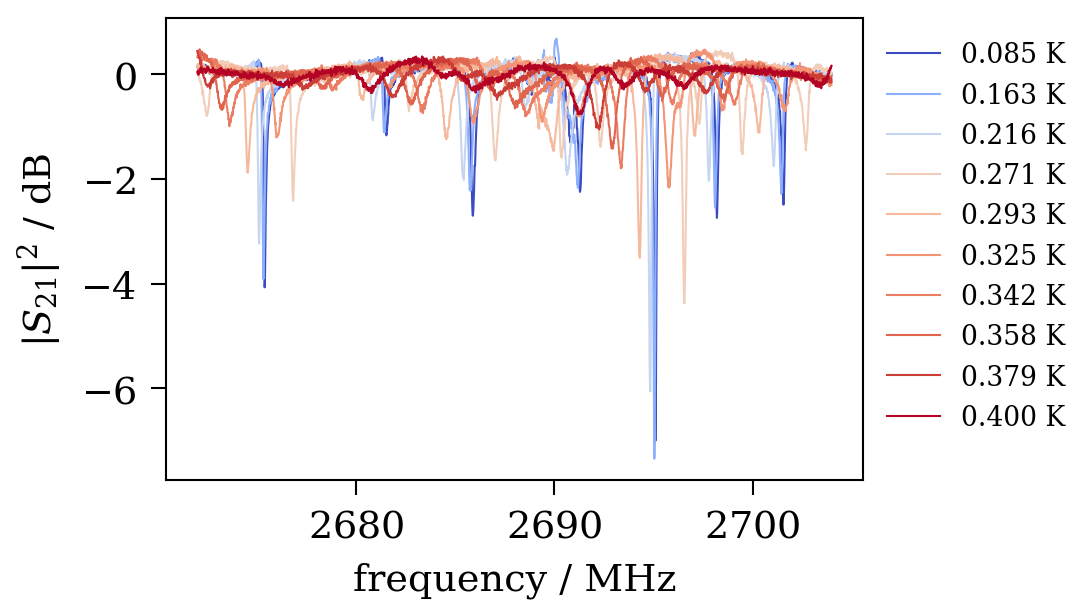

In [157]:
fig, ax = plt.subplots()
T_mappable = plot_all(i17, ax)
#ax.set_xlim(3046, 3071)
#ax.set_ylim(-4.5, 0.5)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 24

In [139]:
i24 = load_index(24)

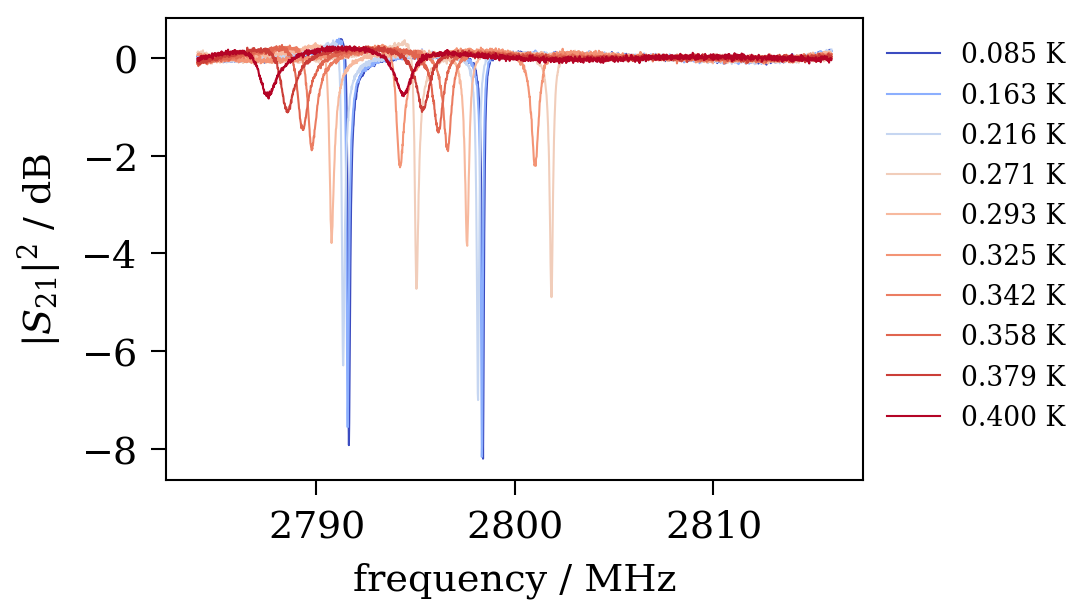

In [160]:
fig, ax = plt.subplots()
plot_all(i24, ax)
#ax.set_xlim(3046, 3071)
#ax.set_ylim(-4.5, 0.5)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

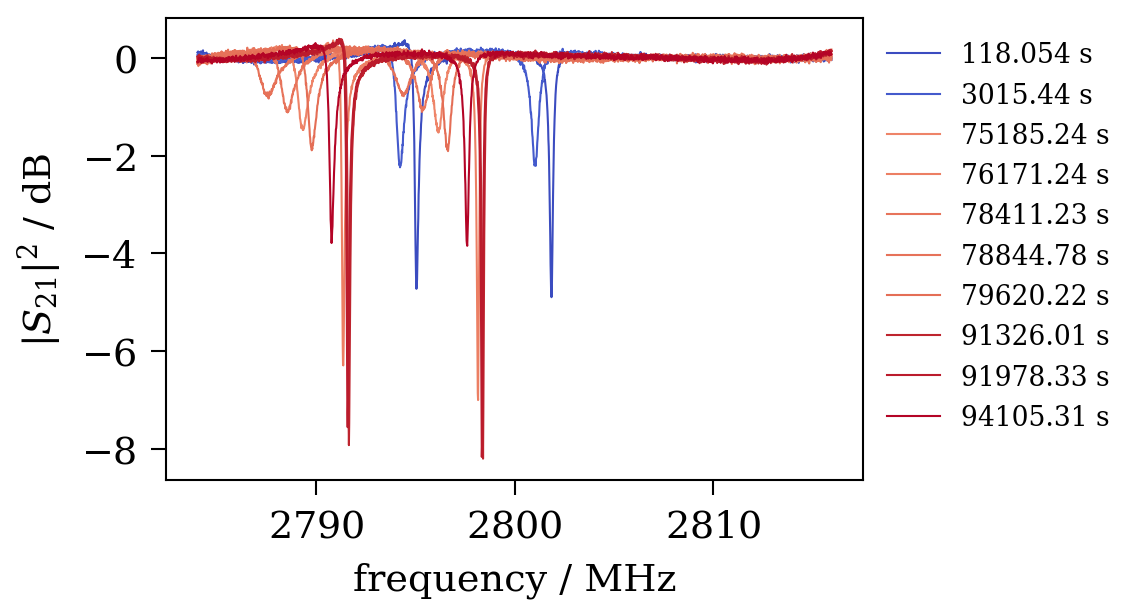

In [173]:
fig, ax = plt.subplots()
plot_all(i24, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 27

In [177]:
i27 = load_index(27)

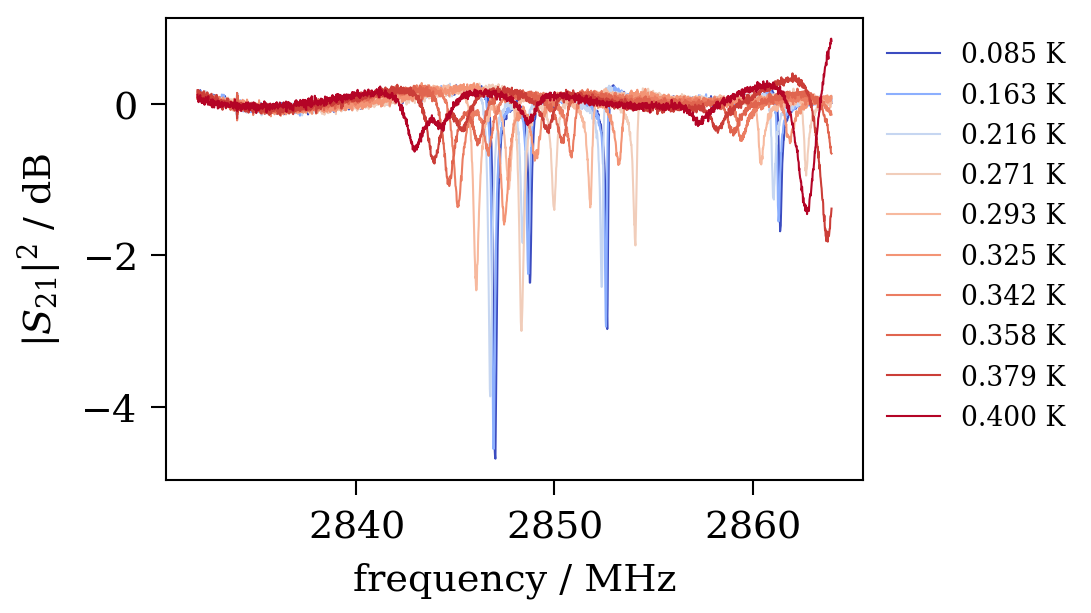

In [178]:
fig, ax = plt.subplots()
plot_all(i27, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

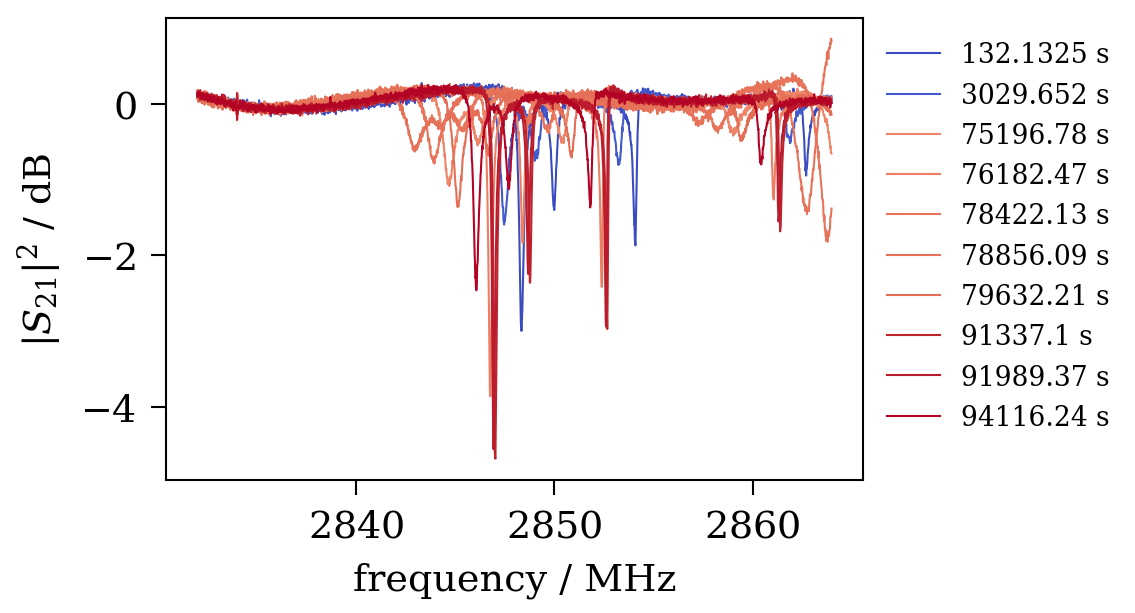

In [179]:
fig, ax = plt.subplots()
plot_all(i27, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 28

In [180]:
i28 = load_index(28)

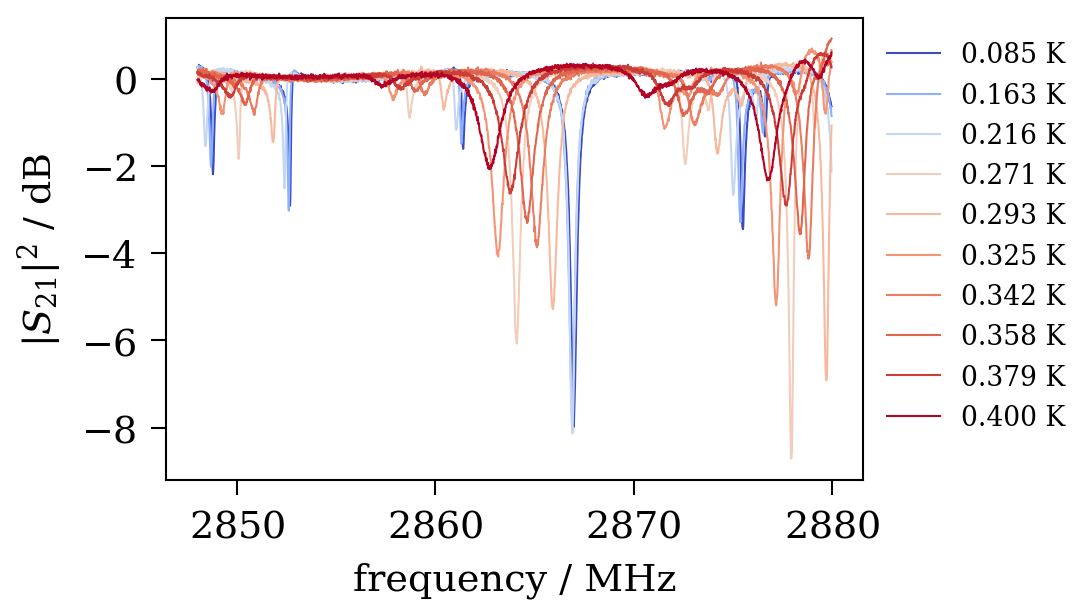

In [181]:
fig, ax = plt.subplots()
plot_all(i28, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

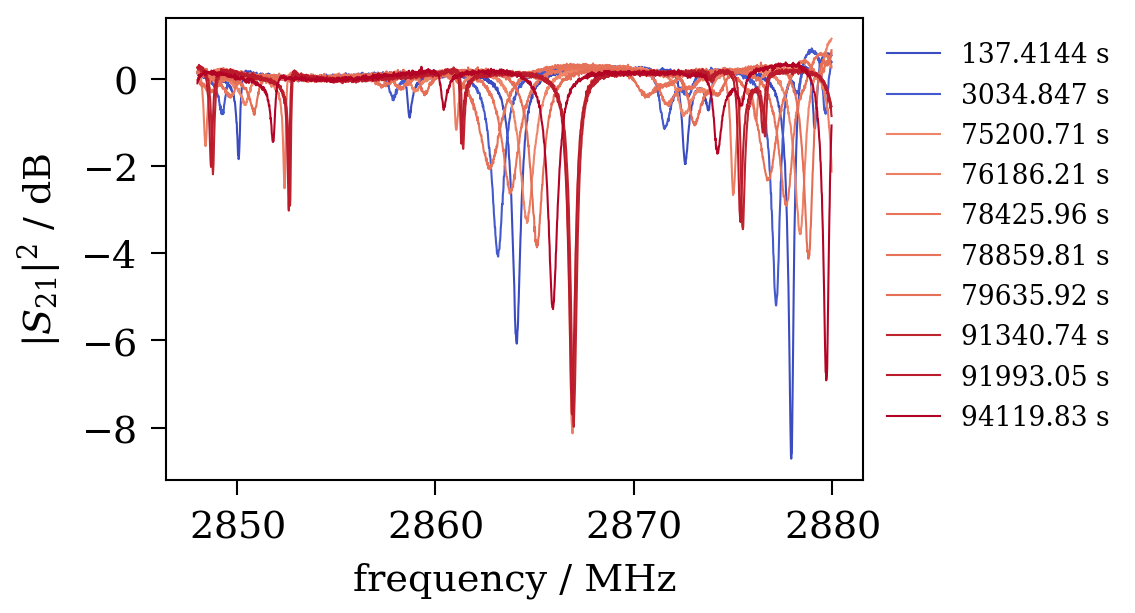

In [182]:
fig, ax = plt.subplots()
plot_all(i28, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 29

In [183]:
i29 = load_index(29)

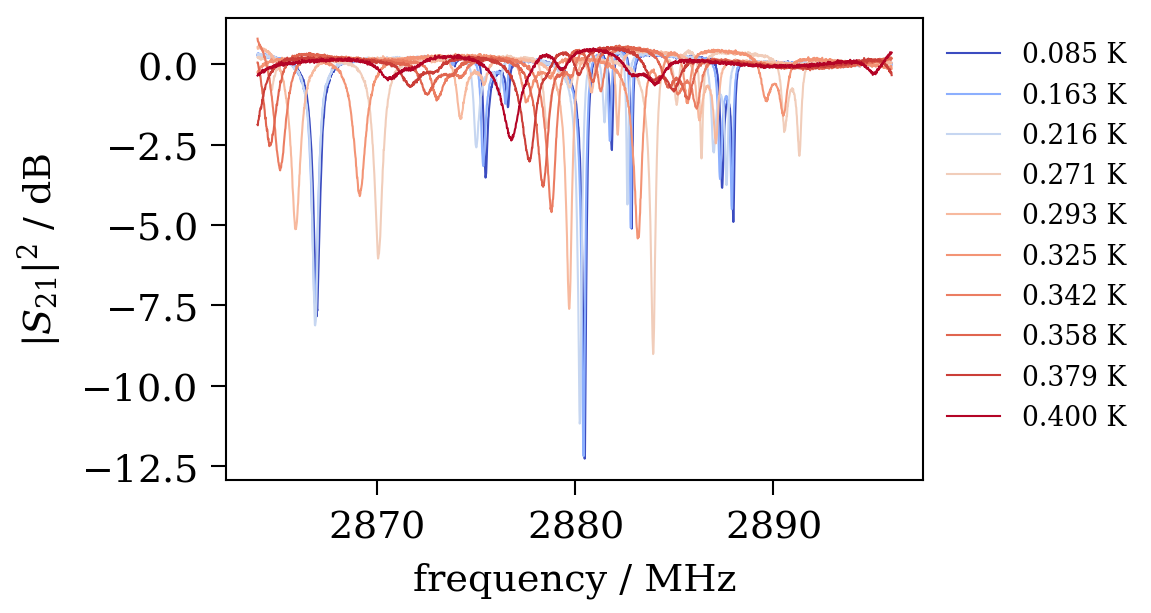

In [184]:
fig, ax = plt.subplots()
plot_all(i29, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

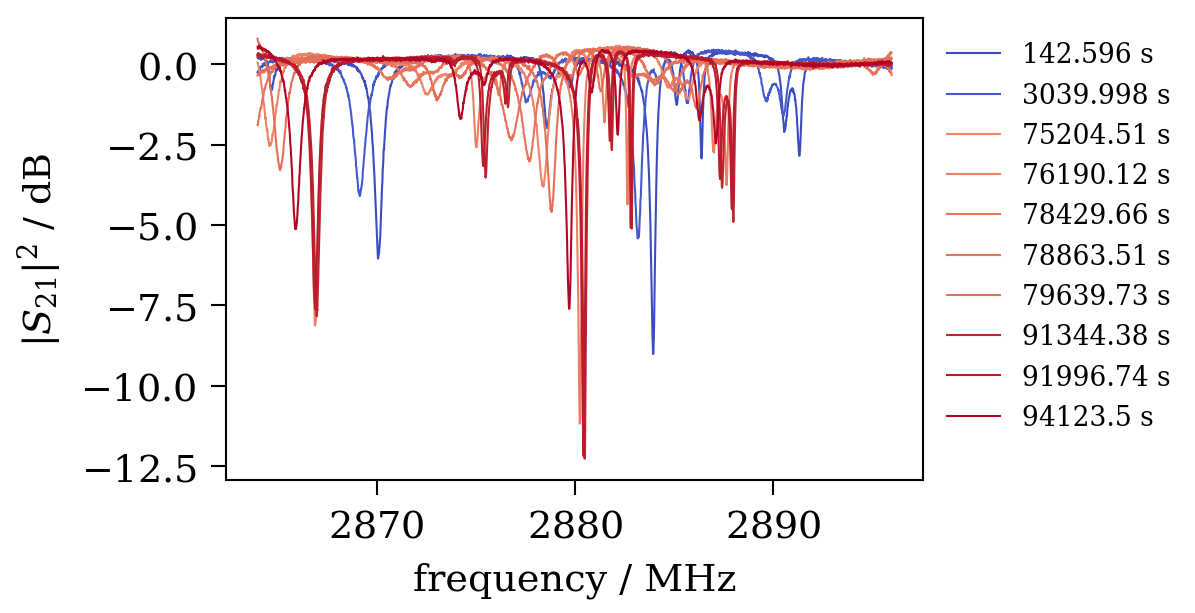

In [185]:
fig, ax = plt.subplots()
plot_all(i29, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 30

In [174]:
i30 = load_index(30)

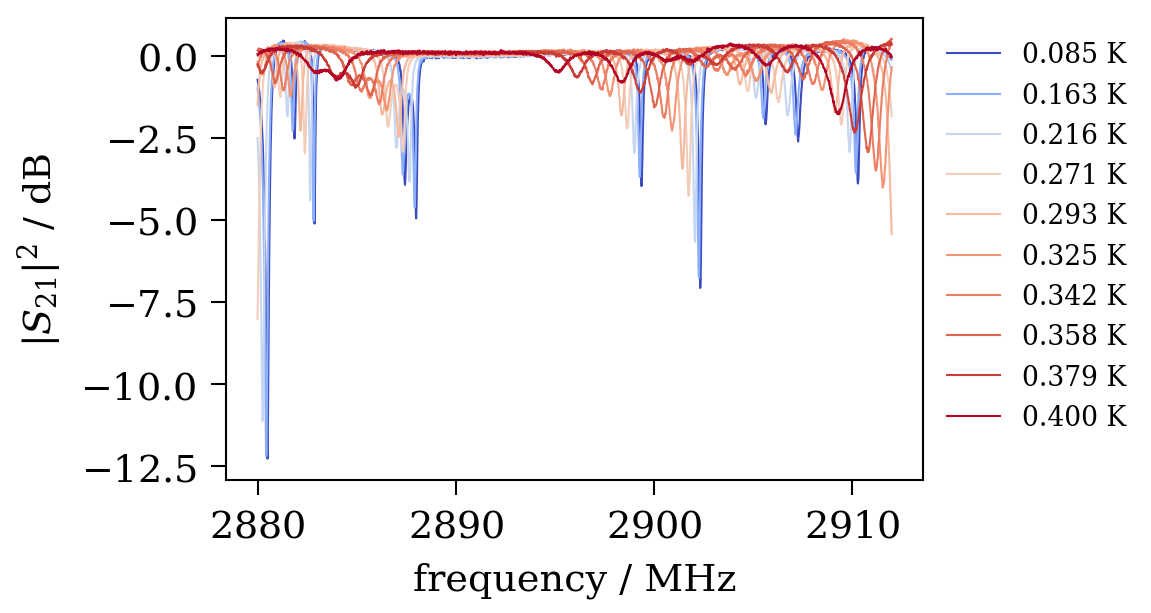

In [175]:
fig, ax = plt.subplots()
plot_all(i30, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

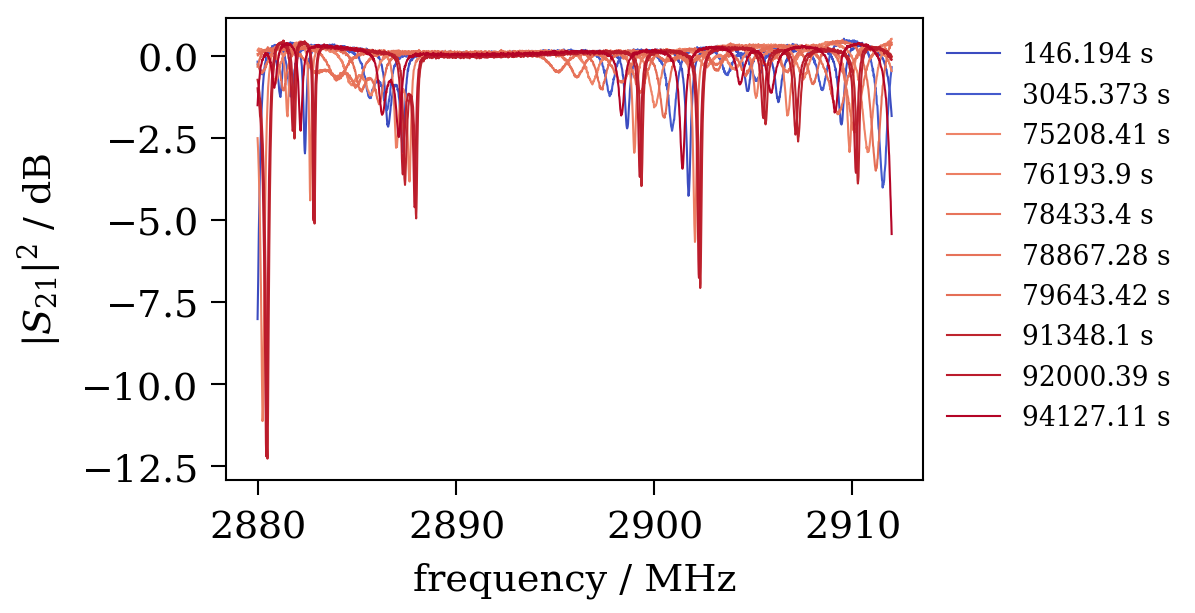

In [176]:
fig, ax = plt.subplots()
plot_all(i30, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 31

In [186]:
i31 = load_index(31)

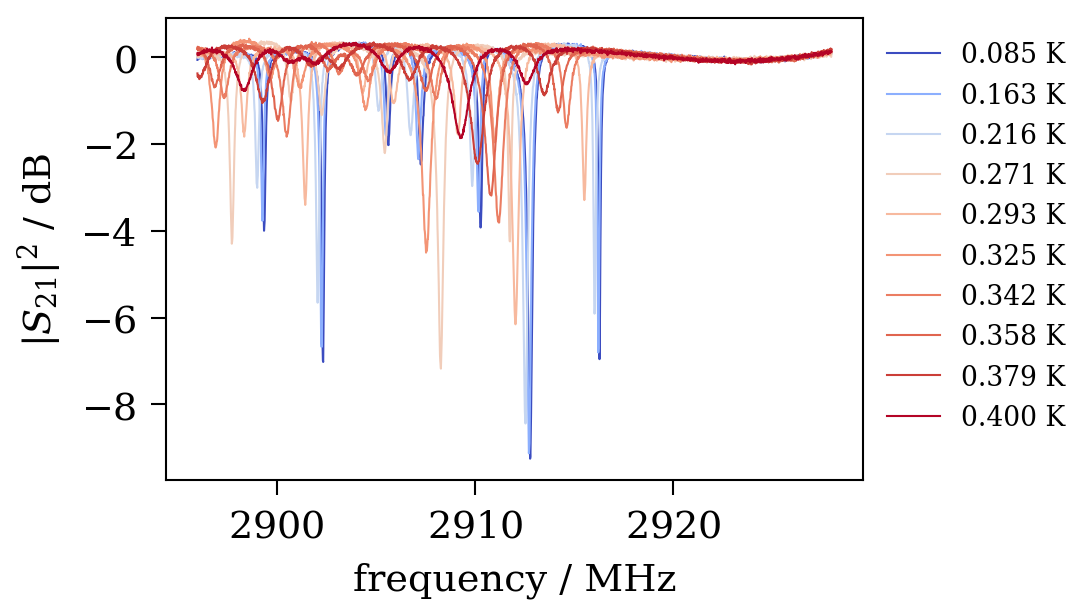

In [188]:
fig, ax = plt.subplots()
plot_all(i31, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

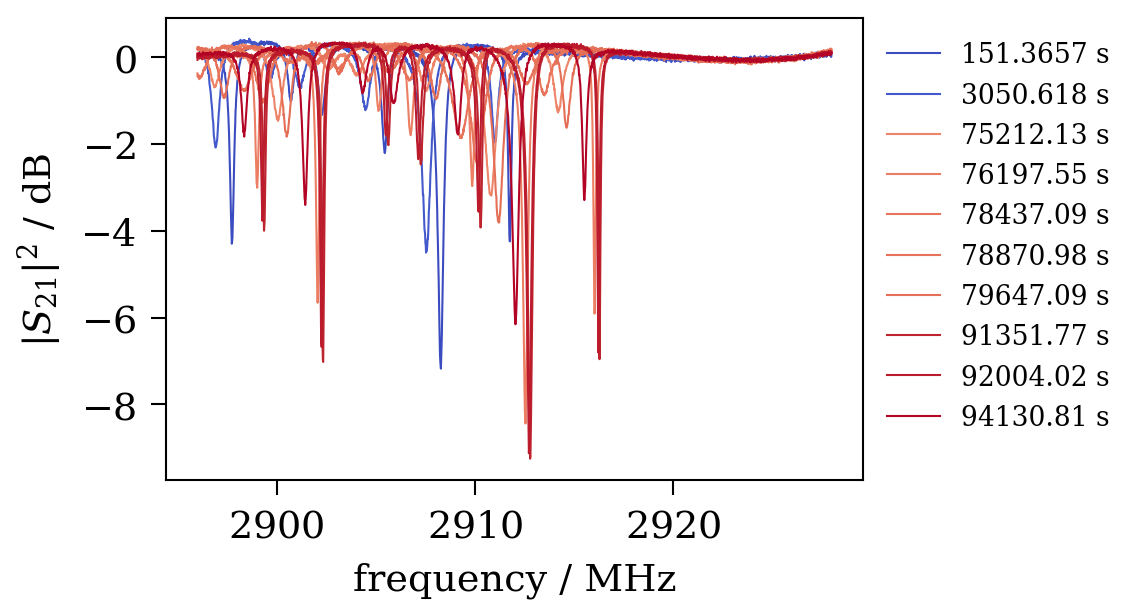

In [187]:
fig, ax = plt.subplots()
plot_all(i31, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 35

In [189]:
i35 = load_index(35)

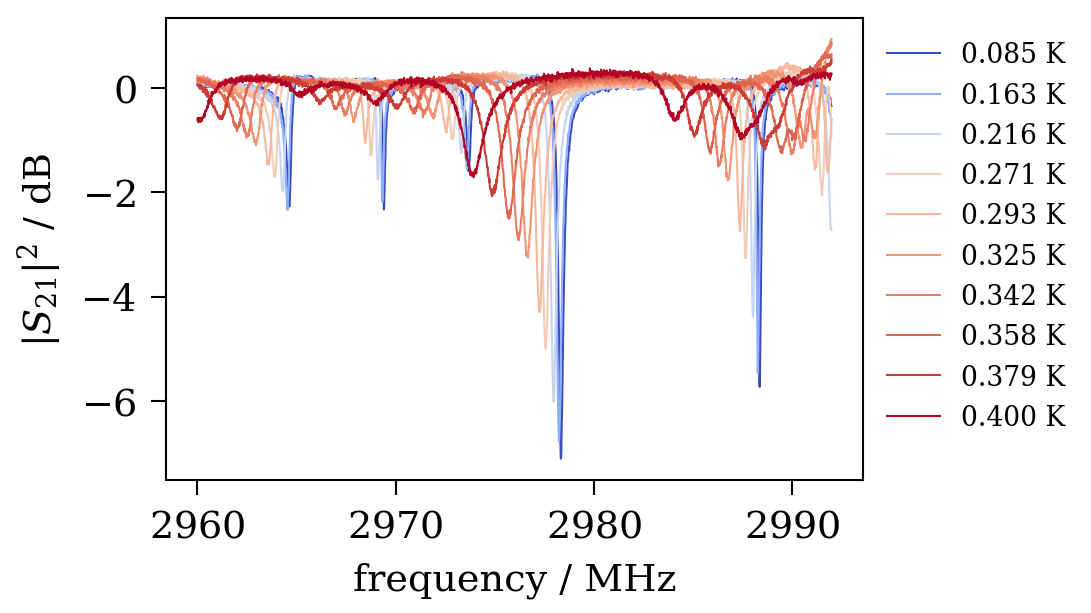

In [191]:
fig, ax = plt.subplots()
plot_all(i35, ax)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

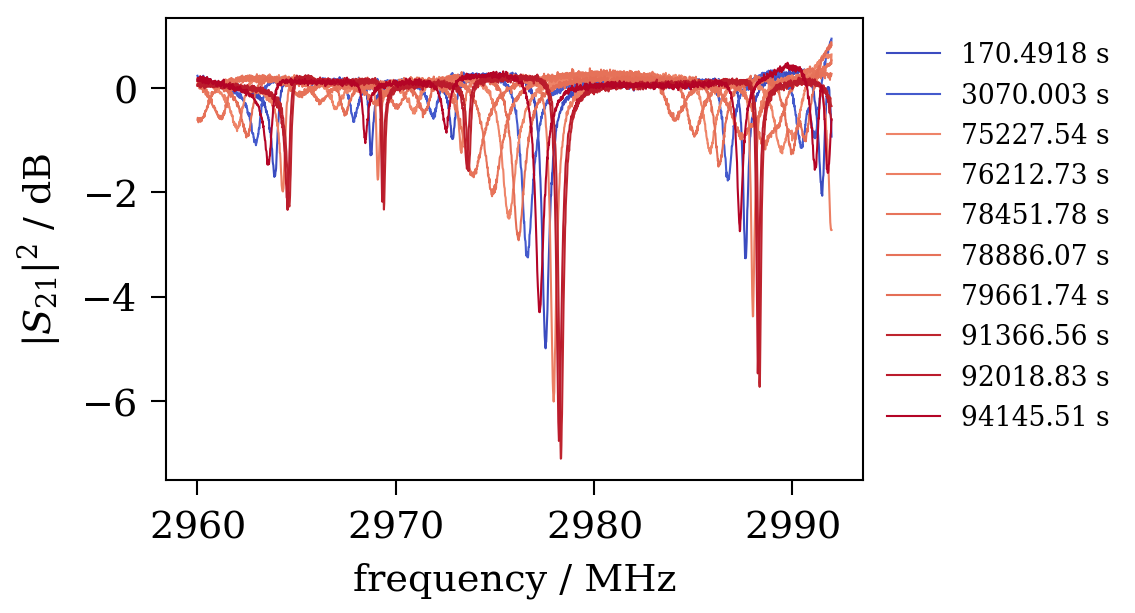

In [192]:
fig, ax = plt.subplots()
plot_all(i35, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# 40

In [43]:
i40 = load_index(40)

retrying...


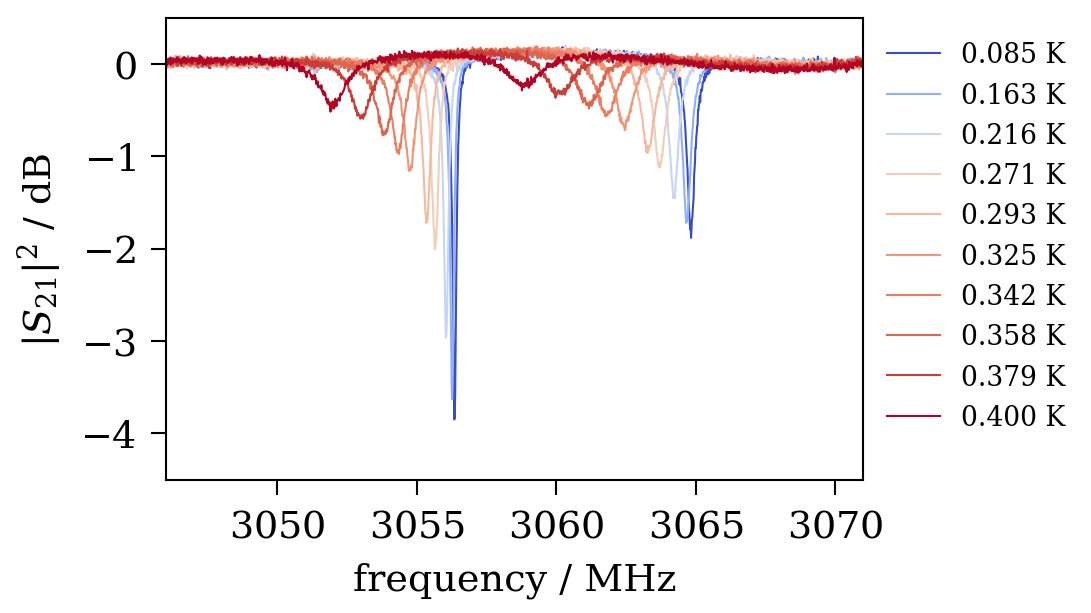

In [161]:
fig, ax = plt.subplots()
plot_all(i40, ax)
ax.set_xlim(3046, 3071)
ax.set_ylim(-4.5, 0.5)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

#fig.savefig(plot_directory + 's21_vs_frequency_sweep_40.pdf')

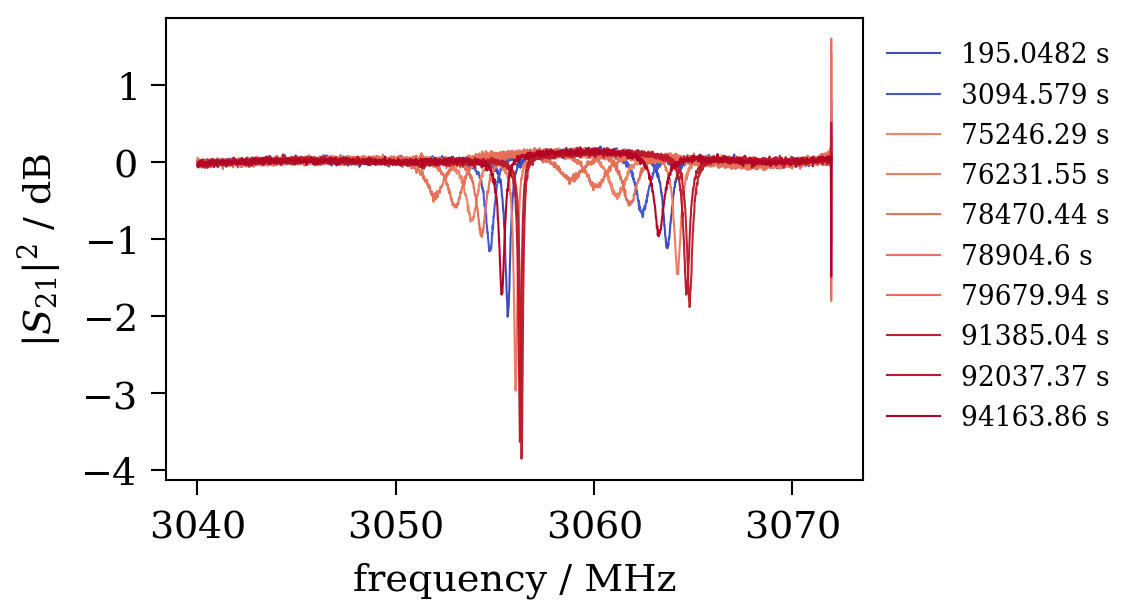

In [190]:
fig, ax = plt.subplots()
plot_all(i40, ax, color_mapper=epoch_mapper, sorter=epoch_sorter, label=epoch_label)
ax.legend(fontsize='xx-small', ncol=1, loc='upper left', bbox_to_anchor=(1, 1))

# Fit and plot

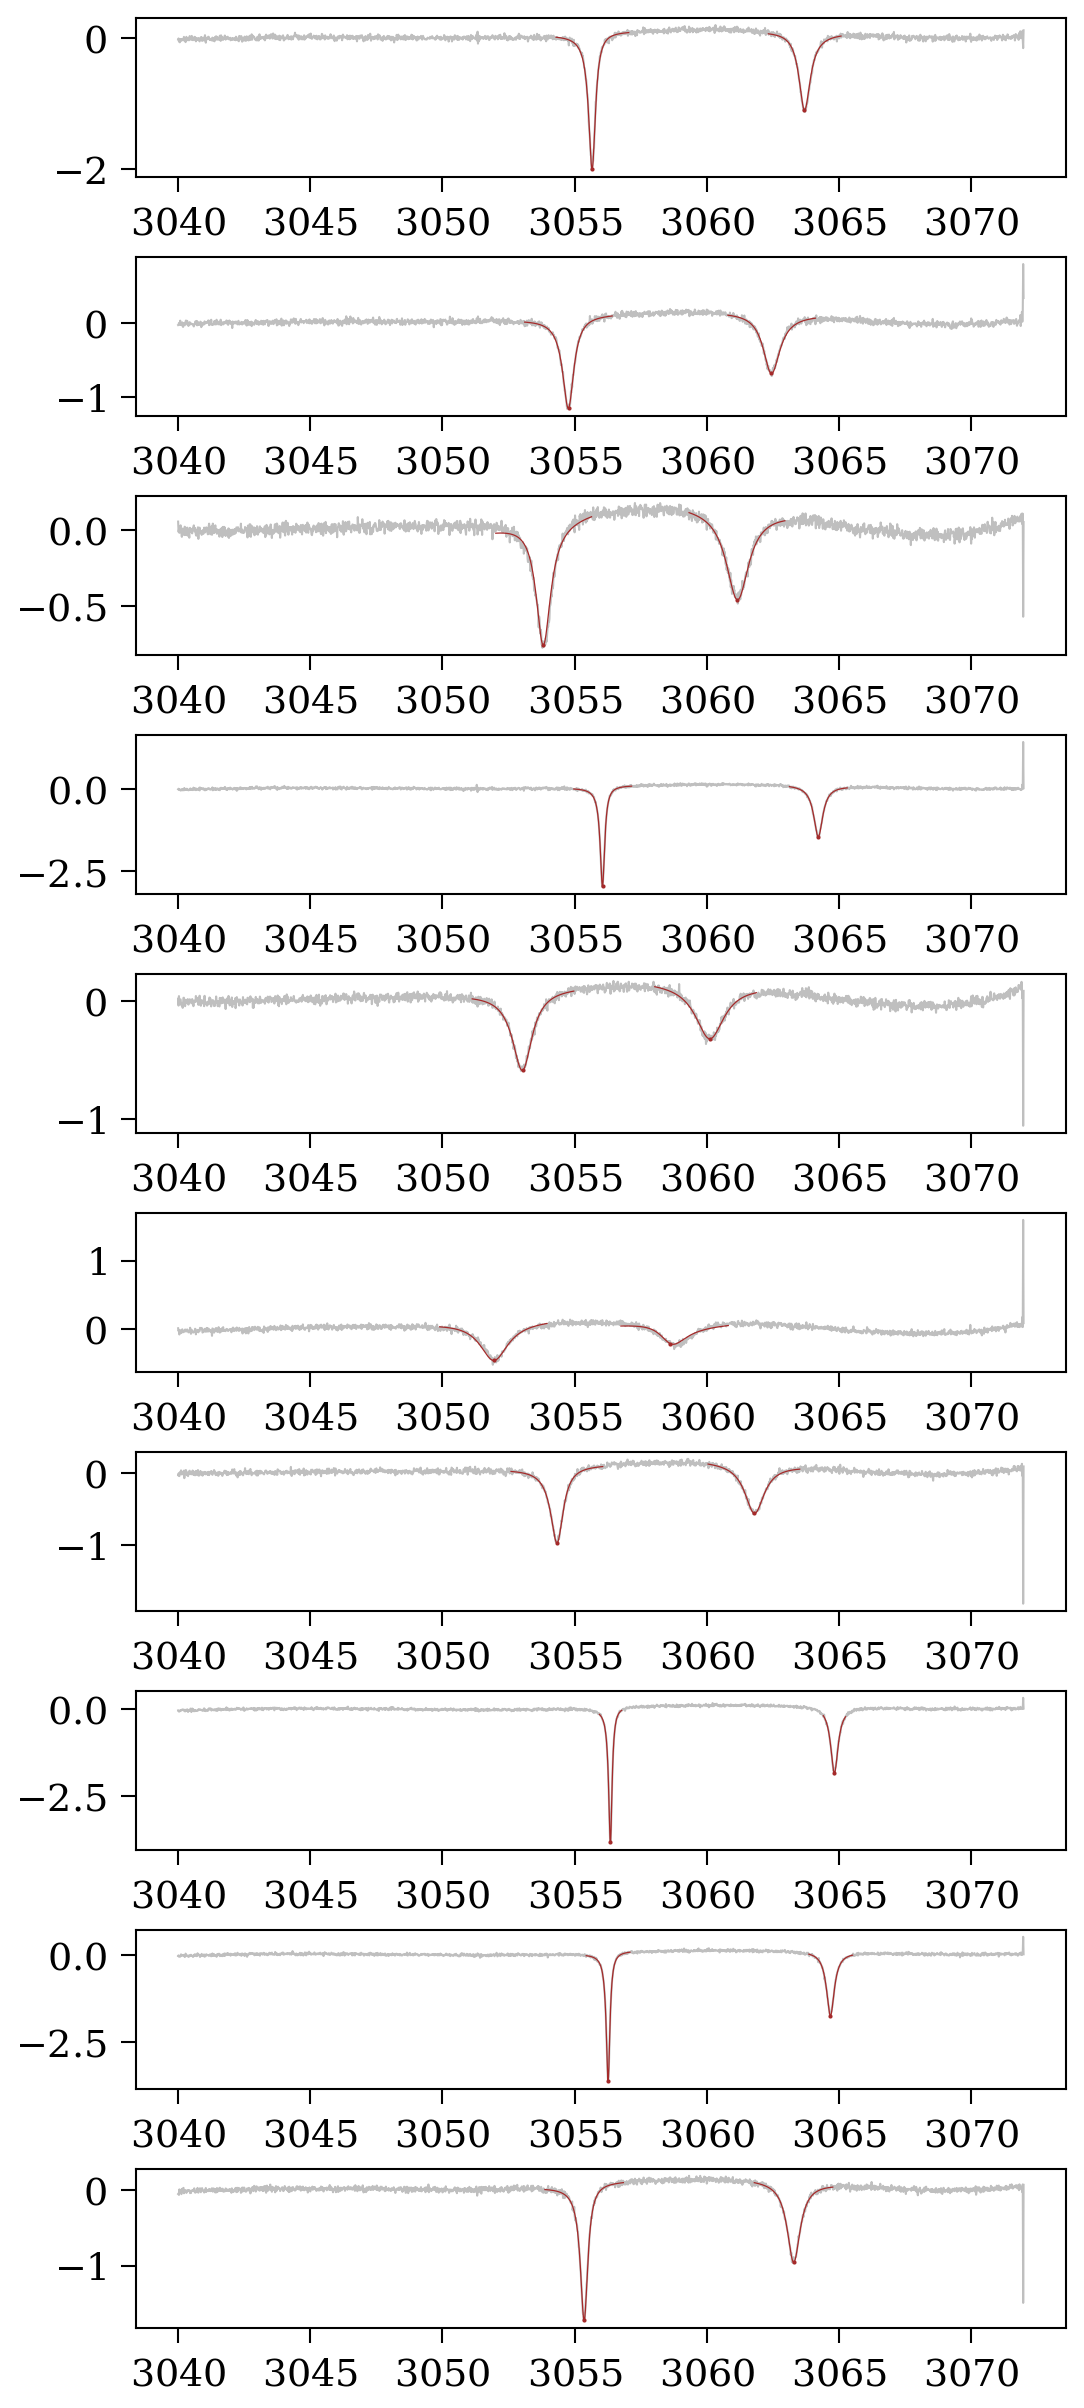

In [162]:
num_sweeps = len(i40)
fig, axes = plt.subplots(num_sweeps, 1, figsize=(4, num_sweeps), gridspec_kw={'wspace': 0.4, 'hspace': 0.5})
for sa, ax in zip(i40, axes.flatten()):
    fit_and_plot(sa, ax, min_snr=0.5, Q=30000, num_linewidths=100 * sa.state.temperature.package, threshold=1,
                mappable=T_mappable)

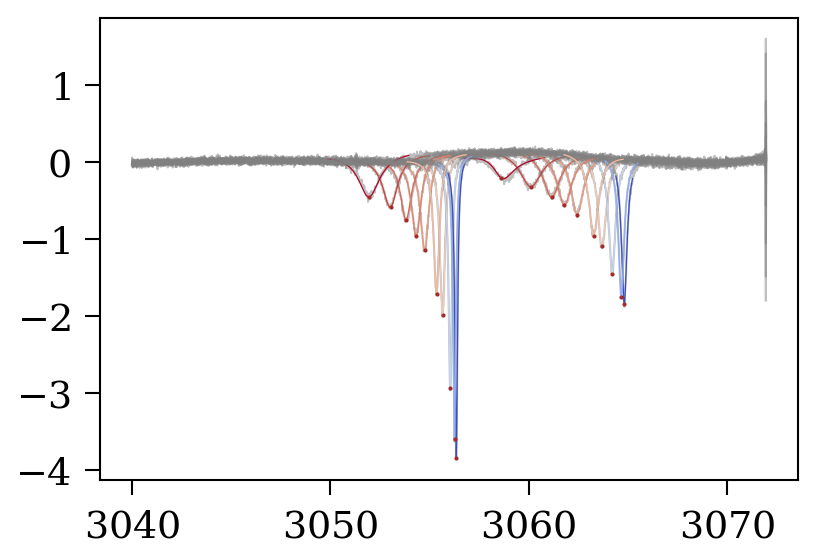

In [86]:
fig, ax = plt.subplots()
for sa in i40:
    fit_and_plot(sa, ax, min_snr=0.5, Q=30000, num_linewidths=100 * sa.state.temperature.package, threshold=1,
                mappable=T_mappable)

In [120]:
x_color = 'blue'
i_color = 'brown'
x_marker = 'X'
i_marker = 'o'

In [98]:
Q = 30000
res_index = 0
rs40 = []
for sa in i40:
    num_linewidths = 100 * sa.state.temperature.package
    peaks = sa.find_resonances(min_snr=0.5, threshold=1)
    r = [sa.resonator(frequency=sa.frequency[peak], width=num_linewidths * sa.frequency.mean() / Q,
                       model=lmfit_resonator.LinearLossResonatorWithCable) for peak in peaks][res_index]
    r.temperature = sa.state.temperature.package
    rs40.append(r)
rs40.sort(key=lambda r: r.temperature)

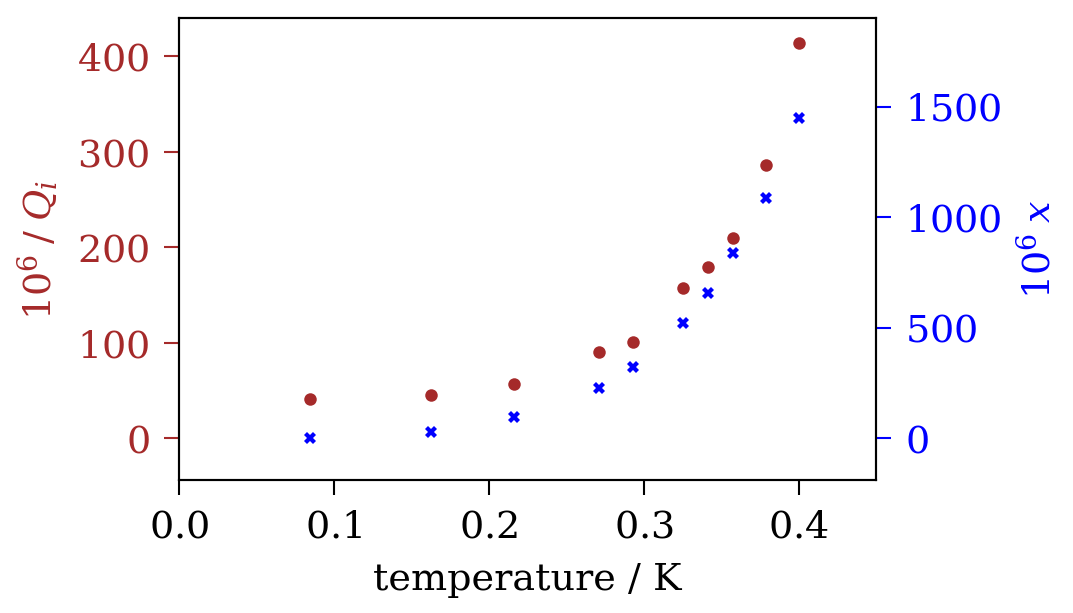

In [129]:
fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
i_ax.set_xlabel('temperature / K')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
i_ax.set_ylabel('$10^6 \; / \; Q_i$', color=i_color)
f_max = np.max([r.f_0 for r in rs40])
x_ax.plot([r.temperature for r in rs40],
          [1e6 * (f_max / r.f_0 - 1) for r in rs40],
          marker=x_marker, color=x_color, linestyle='none')
i_ax.plot([r.temperature for r in rs40],
          [1e6 * r.loss_i for r in rs40],
          marker=i_marker, color=i_color, linestyle='none')
i_ax.set_xlim(0, 0.45)
i_ax.set_ylim(-44, 440)
x_ax.set_ylim(-190, 1900)
i_ax.tick_params(axis='y', colors=i_color)
x_ax.tick_params(axis='y', colors=x_color)

fig.savefig(plot_directory + 'x_and_Qi_vs_temperature.pdf')

(0, 0.45)

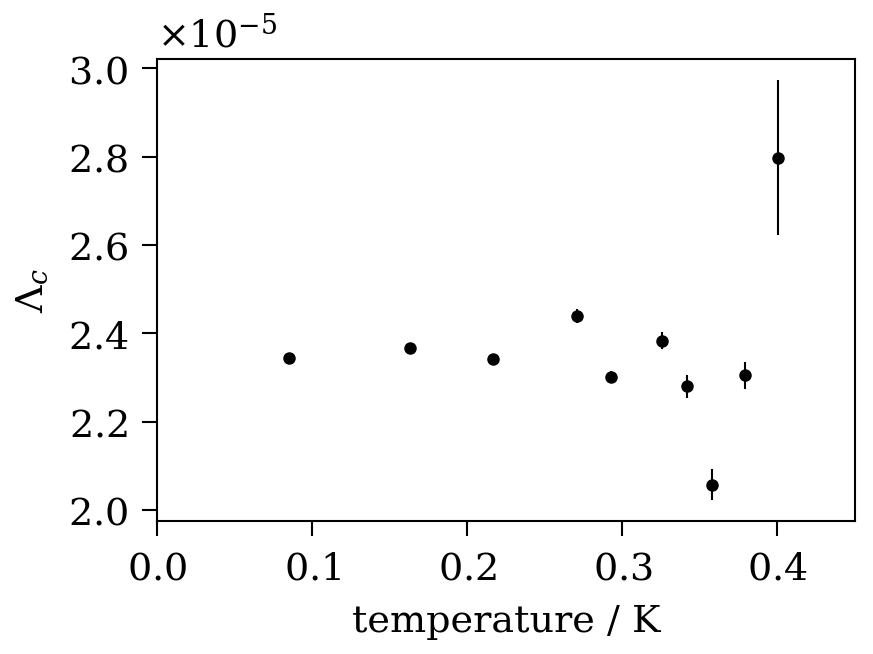

In [131]:
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_ylabel('$\Lambda_c$', color='black')
ax.errorbar([r.temperature for r in rs40],
            [r.loss_c for r in rs40],
            yerr=[r.loss_c_error for r in rs40],
            marker=i_marker, color='black', linestyle='none')
ax.set_xlim(0, 0.45)
#ax.set_ylim(0)